In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


#TODO
!Do this for all PFs (5) --> To get idea of trade-offs between different policies/ outcomes?


In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.1.3
2.5


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  


def sum_over(*args):
    return sum(args)

In [6]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(7)

In [5]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [6]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [7]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [8]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x000000000541BD38>)
ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x000000000541BD38>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x000000000541BD38>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function=<function sum_over at 0x000000000541BD38>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function

In [7]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=2)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 2 policies * 1 model(s) = 200 experiments
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 140 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [22]:
outcomes['A.3_Expected Annual Damage']

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [21]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,91.0,210.473959,10,0.812817,213.960451,1.5,0.948798,54.372251,1.5,0.065908,...,2.0,6.0,8.0,8.0,7.0,10.0,3.0,0,0,dikesnet
1,99.0,113.282304,10,0.230360,75.883778,1.0,0.725959,326.127866,10,0.961924,...,2.0,6.0,8.0,8.0,7.0,10.0,3.0,1,0,dikesnet
2,129.0,292.096383,1.0,0.166990,190.707056,1.0,0.373113,269.207491,1.0,0.160853,...,2.0,6.0,8.0,8.0,7.0,10.0,3.0,2,0,dikesnet
3,47.0,268.421087,1.5,0.194128,108.115115,1.5,0.486611,208.063523,1.0,0.864189,...,2.0,6.0,8.0,8.0,7.0,10.0,3.0,3,0,dikesnet
4,78.0,143.551413,10,0.415436,209.996888,1.5,0.608011,294.582865,1.0,0.855884,...,2.0,6.0,8.0,8.0,7.0,10.0,3.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,88.0,177.684094,1.5,0.840621,93.448005,1.0,0.181134,40.952406,10,0.388058,...,6.0,3.0,2.0,4.0,3.0,1.0,2.0,95,1,dikesnet
196,57.0,298.181537,1.0,0.376622,146.385526,10,0.255752,111.615638,1.0,0.047550,...,6.0,3.0,2.0,4.0,3.0,1.0,2.0,96,1,dikesnet
197,113.0,70.687106,1.0,0.941933,34.535814,10,0.203759,339.303075,1.0,0.947039,...,6.0,3.0,2.0,4.0,3.0,1.0,2.0,97,1,dikesnet
198,10.0,83.966833,10,0.121823,297.823851,1.5,0.673108,314.106915,10,0.555479,...,6.0,3.0,2.0,4.0,3.0,1.0,2.0,98,1,dikesnet


[MainProcess/INFO] model dropped from analysis because only a single category


IndexError: arrays used as indices must be of integer (or boolean) type

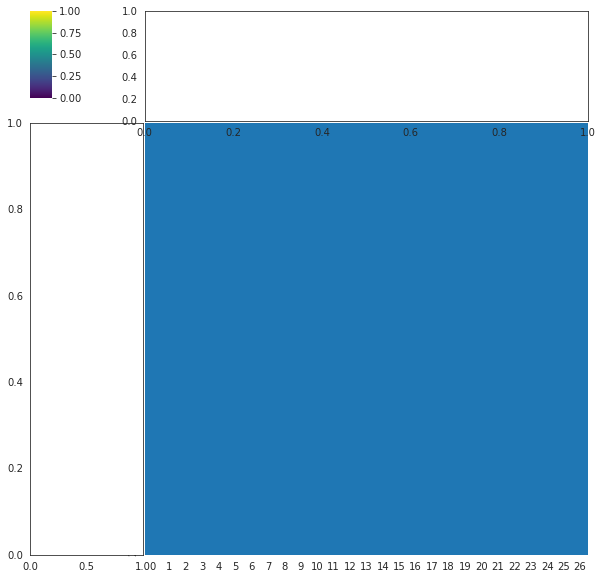

In [8]:
experiments, outcomes = results
from ema_workbench.analysis import dimensional_stacking

cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)

data = outcomes['A.3_Expected Annual Damage']
y = data < np.percentile(data, 10)

dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()


In [27]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments
outcomes

dict_keys(['A.1_Dike Investment Costs', 'A.1_Expected Annual Damage', 'A.1_Expected Number of Deaths', 'A.2_Dike Investment Costs', 'A.2_Expected Annual Damage', 'A.2_Expected Number of Deaths', 'A.3_Dike Investment Costs', 'A.3_Expected Annual Damage', 'A.3_Expected Number of Deaths', 'A.4_Dike Investment Costs', 'A.4_Expected Annual Damage', 'A.4_Expected Number of Deaths', 'A.5_Dike Investment Costs', 'A.5_Expected Annual Damage', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


{'A.1_Dike Investment Costs': array([2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e+08, 2.05147094e+08, 2.05147094e+08,
        2.05147094e+08, 2.05147094e

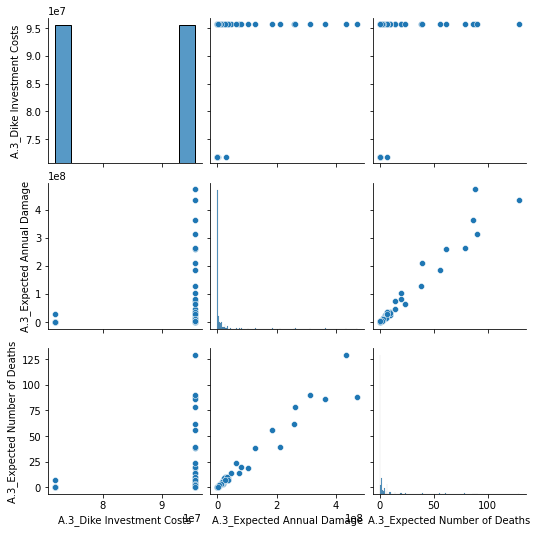

In [26]:
short = dict()
short['A.3_Dike Investment Costs'] = outcomes['A.3_Dike Investment Costs']
short['A.3_Expected Annual Damage'] = outcomes['A.3_Expected Annual Damage']
short['A.3_Expected Number of Deaths'] = outcomes['A.3_Expected Number of Deaths']

sns.pairplot(pd.DataFrame.from_dict(short))
plt.show()

KeyError: 'A.1_Dike Investment Costs'

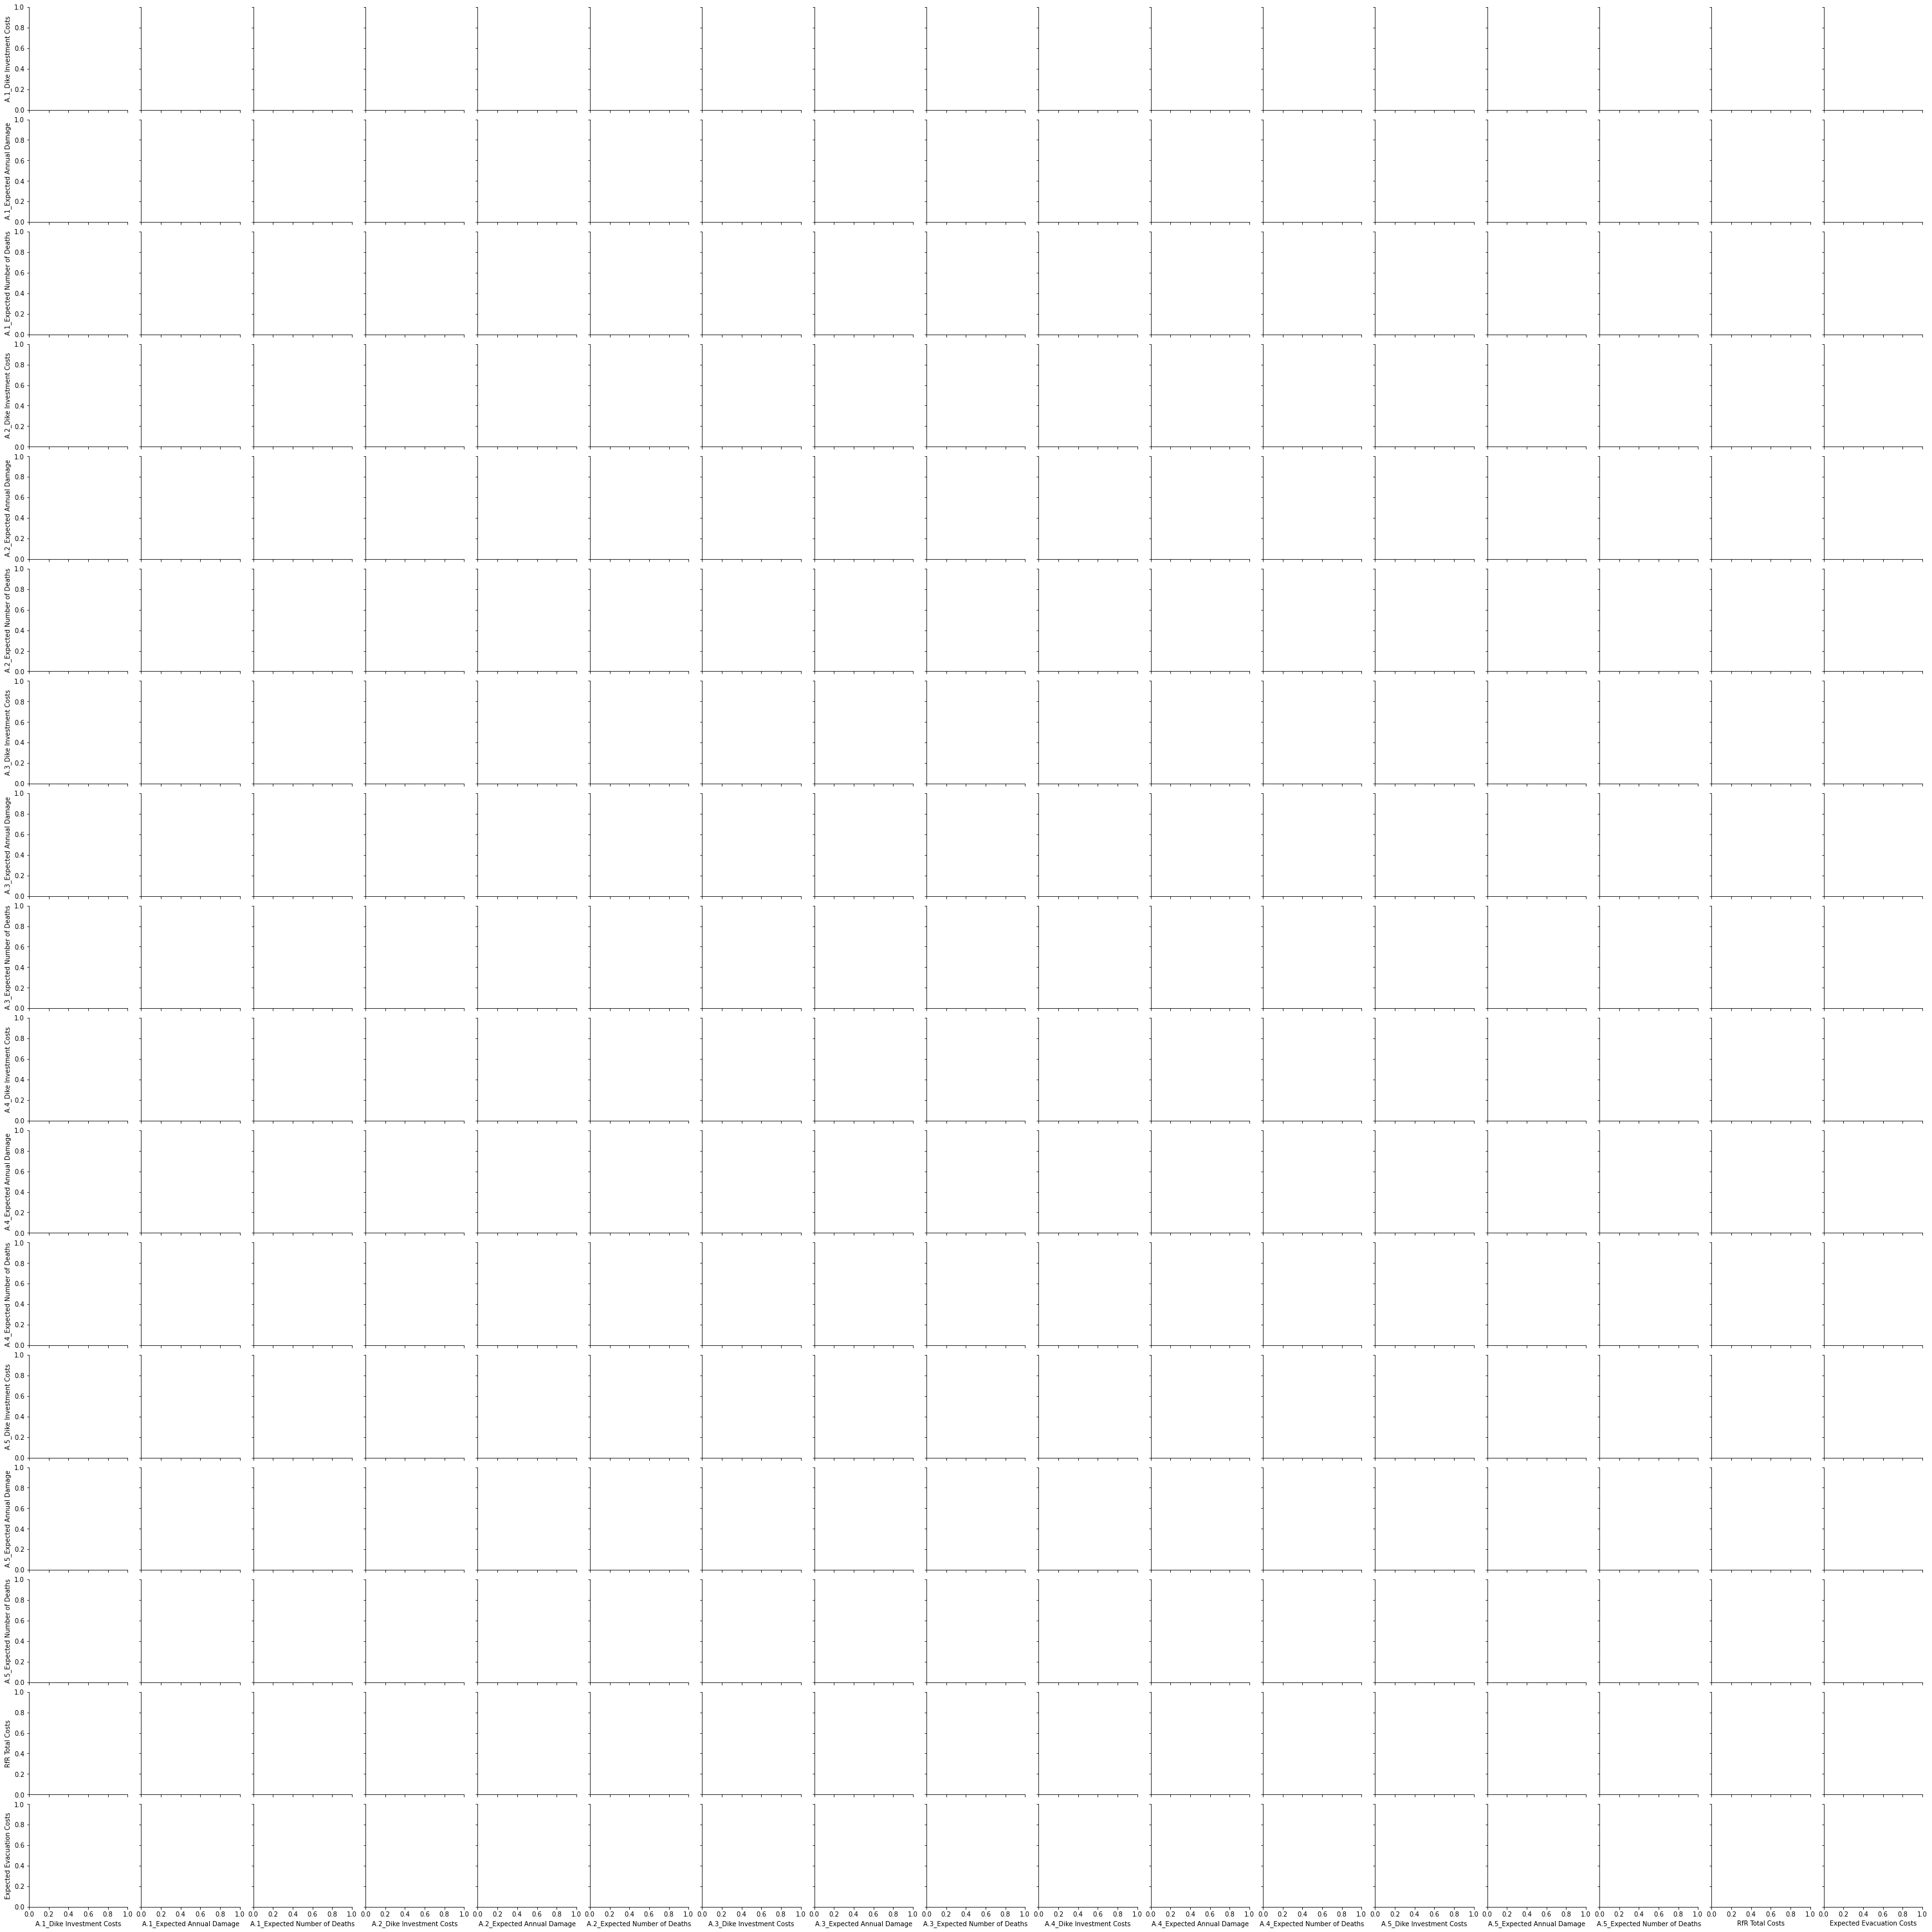

In [30]:
short_dikecosts = dict()
short_dikecosts['A.1_Expected Number of Deaths'] = outcomes['A.1_Expected Number of Deaths']
short_dikecosts['A.2_Expected Number of Deaths'] = outcomes['A.2_Expected Number of Deaths']
short_dikecosts['A.3_Expected Number of Deaths'] = outcomes['A.3_Expected Number of Deaths']
short_dikecosts['A.4_Expected Number of Deaths'] = outcomes['A.4_Expected Number of Deaths']
short_dikecosts['A.5_Expected Number of Deaths'] = outcomes['A.5_Expected Number of Deaths']

policies = experiments['policy']
data = pd.DataFrame.from_dict(short_dikecosts)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()

In [11]:
# Plot the before dataframe per policy (?)

In [12]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

In [ ]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments


In [ ]:
# Plot results after

In [ ]:
experiments, outcomes = results
print(outcomes.keys())
experiments

In [ ]:
data = pd.DataFrame.from_dict(outcomes)

# All outcomes of interest and policies

In [ ]:
policies = experiments['policy']

data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()

# Per Dike Ring + total 

Dike ring 1

Dike ring 2

In [ ]:
data_ring2 = data[['A.2 Total Costs', 'A.2_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']]
outcomes_2 = ['A.2 Total Costs', 'A.2_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
policies = experiments['policy']

#data = pd.DataFrame.from_dict(outcomes)
data_ring2['policy'] = policies

sns.pairplot(data_ring2, hue='policy',  vars=outcomes_2, )
plt.show()

Dike ring 3

In [ ]:
data_ring3 = data[['A.3 Total Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']]
outcomes_3 = ['A.3 Total Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
policies = experiments['policy']

#data = pd.DataFrame.from_dict(outcomes)
data_ring3['policy'] = policies

sns.pairplot(data_ring3, hue='policy',  vars=outcomes_3, )
plt.show()

Dike Ring 4

In [ ]:
data_ring4 = data[['A.4 Total Costs', 'A.4_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']]
outcomes_4 = ['A.4 Total Costs', 'A.4_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
policies = experiments['policy']

#data = pd.DataFrame.from_dict(outcomes)
data_ring4['policy'] = policies

sns.pairplot(data_ring4, hue='policy',  vars=outcomes_4, )
plt.show()

Dike ring 5

In [ ]:
data_ring5 = data[['A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']]
outcomes_5 = ['A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']

policies = experiments['policy']

data_ring5['policy'] = policies

sns.pairplot(data_ring5, hue='policy',  vars=outcomes_5, )
plt.show()